In [77]:
def sigmoid(value):
    from math import exp
    return 1 / (1 + exp(-value))


class MyLogisticRegressor:
    def __init__(self, threshold):
        self.intercept_ = 0.0
        self.coefficients = []
        self.threshold = threshold

    def fit(self, x, y, learning_rate=0.0001, no_epochs=100000):
        self.coefficients = [0.0 for _ in range(len(x[0]) + 1)]
        for epoch in range(no_epochs):
            for i in range(len(x)):
                y_computed = sigmoid(self.eval(x[i]))
                crt_error = y_computed - y[i]
                for j in range(0, len(x[0])):
                    self.coefficients[j] = self.coefficients[j] - learning_rate * crt_error * y_computed * (
                                1 - y_computed) * x[i][j]
                self.coefficients[len(x[0])] = self.coefficients[len(x[0])] - learning_rate * crt_error * y_computed * (
                            1 - y_computed) * 1

        self.intercept_ = self.coefficients[-1]
        self.coefficients = self.coefficients[:-1]
        print(f"Coef {self.coefficients}")
        print(f"Intercept {self.intercept_}")

    def eval(self, xi):
        yi = self.coefficients[-1]
        for j in range(len(xi)):
            yi += self.coefficients[j] * xi[j]
        return yi

    def compute_label(self, xi):
        computed = sigmoid(self.eval(xi))
        print(computed)
        return 0 if computed < self.threshold else 1

    def predict(self, x):
        y_computed = [self.compute_label(xi) for xi in x]
        return y_computed

In [78]:
from ucimlrepo import fetch_ucirepo

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

input_data = breast_cancer_wisconsin_diagnostic.data.features
output_data = breast_cancer_wisconsin_diagnostic.data.targets

In [79]:
input_data_list = [[r1, t1] for r1, r2, r3, t1, t2, t3 in
                   zip(input_data.radius1, input_data.radius2, input_data.radius3, input_data.texture1,
                       input_data.texture2, input_data.texture3)]

In [80]:
output_data

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [81]:
output_data_list = [0 if x == "M" else 1 for x in output_data.Diagnosis]

In [82]:
def normalize_feature(data_arg):
    minimum = min(data_arg)
    maximum = max(data_arg)
    for i in range(len(data_arg)):
        data_arg[i] = (data_arg[i] - minimum) / (maximum - minimum)


def normalize(train_data_arg):
    new_train_data = [[] for _ in range(len(train_data_arg))]
    for i in range(len(train_data_arg[0])):
        aux_list = [train_data_arg[r][i] for r in range(len(train_data_arg))]
        normalize_feature(aux_list)
        for t in range(len(train_data_arg)):
            new_train_data[t].append(aux_list[t])

    return new_train_data


def normalisation(train_data, test_data):
    if not isinstance(train_data[0], list):
        train_data = [[d] for d in train_data]
        test_data = [[d] for d in test_data]

        normalised_train_data = normalize(train_data)
        normalised_test_data = normalize(test_data)

        normalised_train_data = [d[0] for d in normalised_train_data]
        normalised_test_data = [d[0] for d in normalised_test_data]
    else:
        normalised_train_data = normalize(train_data)
        normalised_test_data = normalize(test_data)

    return normalised_train_data, normalised_test_data

In [83]:
from random import shuffle

indexes = [i for i in range(len(input_data_list))]
shuffle(indexes)
train_indexes = indexes[:int(0.75 * len(input_data_list))]
train_input_data = [input_data_list[i] for i in range(len(input_data_list)) if i in train_indexes]
test_input_data = [input_data_list[i] for i in range(len(input_data_list)) if i not in train_indexes]
train_output_data = [output_data_list[i] for i in range(len(input_data_list)) if i in train_indexes]
test_output_data = [output_data_list[i] for i in range(len(input_data_list)) if i not in train_indexes]

train_input_data, test_input_data = normalisation(train_input_data, test_input_data)

model = MyLogisticRegressor(0.45)
model.fit(train_input_data, train_output_data)

predicted = model.predict(test_input_data)
# print(predicted)

Coef [-11.454670877621245, -3.9543145220695686]
Intercept 5.78144139177803
2.2941050328922673e-06
0.00043190778558858267
1.3109531962401224e-05
8.369813213364455e-07
0.000254185841287591
0.0002778035477997678
8.67217751044424e-06
0.0003946570534594901
5.803716698338409e-07
1.4321008399841038e-05
7.87429717766829e-05
8.878371791693508e-07
0.00011010534549832596
0.0006862172117673231
0.00016864391951894146
0.012132593896455412
0.0024373246530009908
0.0035423578245115527
0.0002995039293313967
0.0061918281795483796
1.7505346669193114e-05
0.0002184697005283007
6.740381687017832e-07
0.00016111085810564574
0.00013745757952830822
0.0003609200627331176
0.0012773967038843628
5.424488013694401e-05
0.00028222269116105883
0.0022310973851850133
6.19185058946129e-05
6.753227682878596e-05
1.2233805648403038e-05
0.002062869614285541
0.0002362429989942264
0.00020186775288000148
0.00010784878697542371
0.001452670815012342
2.2416209928667403e-05
0.0005842857293310135
4.450433251650752e-05
0.00349232423457

In [84]:
err = 0
for y, r in zip(predicted, test_output_data):
    err += (y - r) ** 2

print(f"Error {err / len(test_output_data)}")

Error 0.6153846153846154


In [85]:
a = [[18, 10]]
result = model.predict(a)
if result[0] == 1:
    print("Malign")
else:
    print("Benign")

3.6701759232325004e-109
Benign


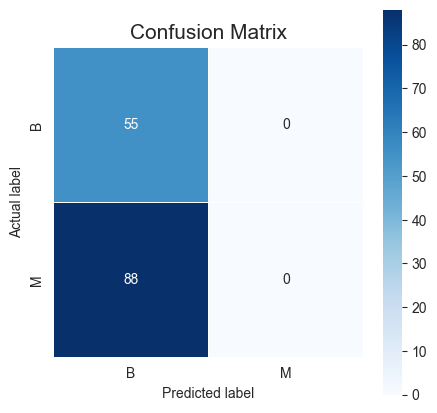

In [86]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_output_data, predicted)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues', xticklabels=["B", "M"],
            yticklabels=["B", "M"])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.show()